In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MaxNLocator
import numpy as np
import seaborn as sns
import cycler 
from scipy.optimize import curve_fit

### Guidelines for plots

* **Both axes labelled + units always**
* **No more than 6 major ticks per axis**


* Size: export plot at final size/resolution if possible (do not resize)
* All text **should be readable at final resolution** (err on the larger size)
* Linewidths: be sensible. Around 1.5-2pt is recommended.
* Data points above lines


* Understand the difference between **categorical**, **sequential**, and **diverging** colour palettes and when to use them : https://seaborn.pydata.org/tutorial/color_palettes.html. 
* If possible use colourblind-friendly palette: https://venngage.com/blog/color-blind-friendly-palette/

### 1. Plot formatter function

In [2]:
def formatplot(ax,xlabel=False,ylabel=False,title=False,
               xlim=False,ylim=False, xticks=False, yticks=False,
               logx=False,logy=False,logxy=False,symlogx=False,
               padx=12,pady=12,
               lw=1.5):

    # This is a helper function to easily set plot properties. 
    # You can write your own or add this code directly to the plot call.
    
    ######### SET TITLES AND LABLES #########

    if title:
        ax.set_title(title)
    if xlabel:
        ax.set_xlabel(xlabel, labelpad=padx)
    if ylabel:    
        ax.set_ylabel(ylabel, labelpad=pady)

    ######### SET AXES LIMITS #########

    if xlim:
        ax.set_xlim(xlim)
    if ylim:
        ax.set_ylim(ylim)

    ######### SET TICK VALUES #########
    
    if xticks:
        ax.set_xticks(xticks)
    if yticks:
        ax.set_yticks(yticks)

    ######### SET LINE THICKNESSES #########

    ax.spines['bottom'].set_linewidth(lw)
    ax.spines['top'].set_linewidth(lw)
    ax.spines['left'].set_linewidth(lw)
    ax.spines['right'].set_linewidth(lw) 

    ######### SET TICKS #########

    if logx==True:

        ax.set_xscale("log")

    elif logy==True:

        ax.set_yscale("log")

    elif logxy==True:

        ax.set_xscale("log")
        ax.set_yscale("log")
    
    elif symlogx==True:

        ax.set_xscale("symlog",linthreshx=1e-4)
        ax.set_yscale("log")

    else:
        minorLocatorx=AutoMinorLocator(2) # Number of minor intervals per major interval
        minorLocatory=AutoMinorLocator(2)
        ax.xaxis.set_minor_locator(minorLocatorx)
        ax.yaxis.set_minor_locator(minorLocatory)

    ax.tick_params(which='major', width=lw, length=8, pad=9,direction='in',top='on',right='on')
    ax.tick_params(which='minor', width=lw, length=4, pad=9,direction='in',top='on',right='on')

In [3]:
# Some random data
x = np.random.rand(20)
xerr = 0.01 
yerr = 0.5*np.random.normal(size=x.size)
y = 5*x + 0.5 + yerr

# Some random fit
def fitfunction(x,m,c):
    return m*x + c

popt, pcov = curve_fit(fitfunction, x, y)
yfit = popt[0]*x + popt[1]

### 2. Single plot without errorbars

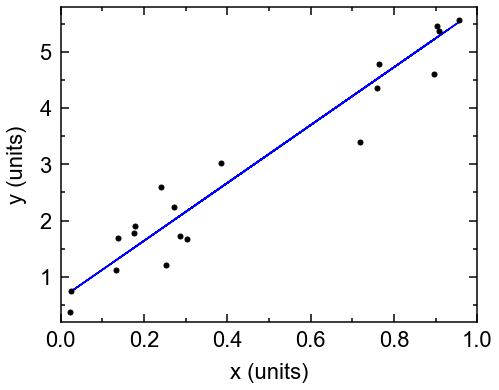

In [4]:
# Single plot without errorbars

# 1. Define global plot parameters
plt.close("all")
DPI=150
figure_options={'figsize':(8.27,5.83)} #figure size in inches. A4=11.7x8.3. A5=8.27,5.83
font_options={'size':'22','family':'sans-serif','sans-serif':'Arial'}
plt.rc('figure', **figure_options)
plt.rc('font', **font_options)
LINEWIDTH = 1.5
MARKERSIZE = 5

# 2. Call and format plots
f, ax=plt.subplots()
plt.subplots_adjust(left=0.25,bottom=0.2,right=0.95,top=0.95) # Set size of plot precisely

ax.plot(x,yfit,'b-',lw=LINEWIDTH)
ax.plot(x,y,'ko',ms=MARKERSIZE)
formatplot(ax,'x (units)', 'y (units)',lw=LINEWIDTH, xlim=[0,1], ylim=[0.2,5.8])

# 3. Output and save
# f.tight_layout() # Arrange plot so fits in frame; overrides size setting in #2
# plt.savefig('./plot.pdf',dpi=DPI,transparent=True)

### How to use the plot formatter function

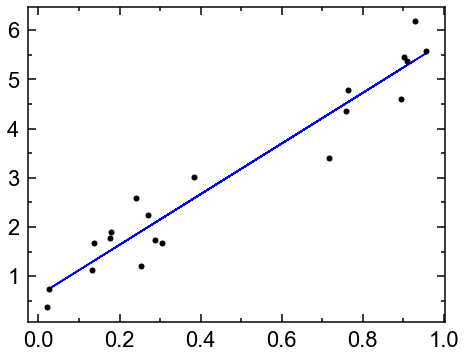

In [5]:
# We can call the plot formatter with default values
f, ax=plt.subplots()
plt.subplots_adjust(left=0.25,bottom=0.2,right=0.95,top=0.95) # Set size of plot precisely

ax.plot(x,yfit,'b-',lw=LINEWIDTH)
ax.plot(x,y,'ko',ms=MARKERSIZE)
formatplot(ax) # <<<<< HERE

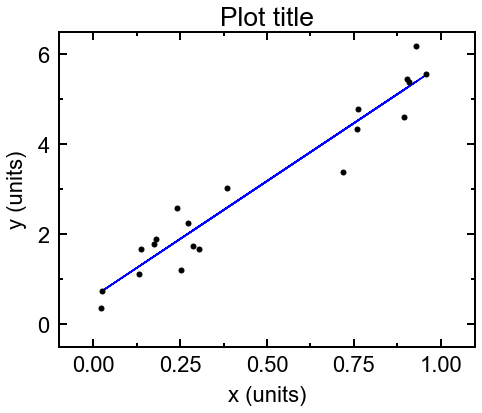

In [6]:
# Or we can specify any number of parameters
f, ax=plt.subplots()
plt.subplots_adjust(left=0.25,bottom=0.2,right=0.95,top=0.95) # Set size of plot precisely

ax.plot(x,yfit,'b-',lw=LINEWIDTH)
ax.plot(x,y,'ko',ms=MARKERSIZE)

formatplot(ax,xlabel='x (units)',ylabel='y (units)',title='Plot title',
               xlim=[-0.1,1.1],ylim=[-0.5,6.5], xticks=[0.0,0.25,0.5,0.75,1.0], yticks=[0,2,4,6],
               padx=10,pady=10, # Distance between axes labels and ticks
               lw=2) # Global linewidths 

### 3. Single plot with errorbars

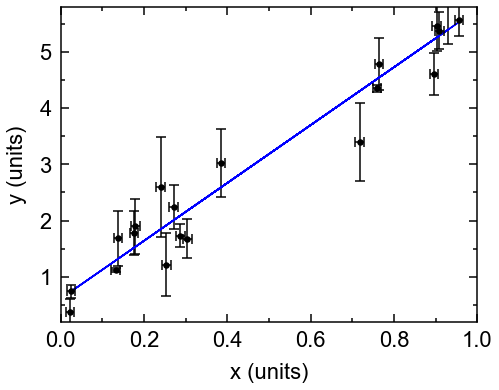

In [7]:
# Single plot with errorbars

# 1. Define global plot parameters
plt.close("all")
DPI=150
figure_options={'figsize':(8.27,5.83)} #figure size in inches. A4=11.7x8.3. A5=8.27,5.83
font_options={'size':'22','family':'sans-serif','sans-serif':'Arial'}
plt.rc('figure', **figure_options)
plt.rc('font', **font_options)
LINEWIDTH = 1.5
MARKERSIZE = 5

# 2. Call and format plots
f, ax=plt.subplots()
plt.subplots_adjust(left=0.25,bottom=0.2,right=0.95,top=0.95) # Set size of plot precisely

ax.plot(x,yfit,'b-',lw=LINEWIDTH)
ax.errorbar(x,y,xerr=xerr,yerr=yerr,
            fmt='ko',ms=MARKERSIZE,elinewidth=LINEWIDTH,capsize=5,mew=1.5)
formatplot(ax,'x (units)', 'y (units)',lw=LINEWIDTH, xlim=[0,1], ylim=[0.2,5.8])

# 3. Output and save
# f.tight_layout() # Arrange plot so fits in frame; overrides size setting in #2
# plt.savefig('./plot.pdf',dpi=DPI,transparent=True)

### 4. Subplots with errorbars

In [8]:
# Subplots

# 1. Define global plot parameters
plt.close("all")
DPI=150
figure_options={'figsize':(8.27,5.83)} #figure size in inches. A4=11.7x8.3. A5=8.27,5.83
font_options={'size':'14','family':'sans-serif','sans-serif':'Arial'}
plt.rc('figure', **figure_options)
plt.rc('font', **font_options)
LINEWIDTH = 1.5
MARKERSIZE = 5

# 2. Call plots
f, axarr=plt.subplots(2,2)
plt.subplots_adjust(left=0.25,bottom=0.2,right=0.95,top=0.95) # Set size of plot precisely

axarr[0,0].errorbar(x,y,xerr=xerr,yerr=yerr,
                  fmt='ko',ms=MARKERSIZE,elinewidth=LINEWIDTH,capsize=5,mew=1.5)
axarr[0,1].errorbar(x,y,xerr=xerr,yerr=yerr,
                  fmt='ro',ms=MARKERSIZE,elinewidth=LINEWIDTH,capsize=5,mew=1.5)
axarr[1,0].errorbar(x,y,xerr=xerr,yerr=yerr,
                  fmt='bo',ms=MARKERSIZE,elinewidth=LINEWIDTH,capsize=5,mew=1.5)
axarr[1,1].errorbar(x,y,xerr=xerr,yerr=yerr,
                  fmt='go',ms=MARKERSIZE,elinewidth=LINEWIDTH,capsize=5,mew=1.5)

# 3. Format plots
formatplot(axarr[0,0],'x (units)', 'y (units)', lw=LINEWIDTH)
formatplot(axarr[0,1],'x (units)', 'y (units)', lw=LINEWIDTH)
formatplot(axarr[1,0],'x (units)', 'y (units)', lw=LINEWIDTH)
formatplot(axarr[1,1],'x (units)', 'y (units)', lw=LINEWIDTH)

# 4. Output and save

 f.tight_layout() # Arrange plot so fits in frame; overrides size setting in #2
# plt.savefig('./plot.pdf',dpi=DPI,transparent=True)

IndentationError: unexpected indent (<ipython-input-8-cd31a233edcf>, line 34)

### 5. Multiple curves

In [9]:
# Some random curves
NUMBEROFCURVES=5
x = np.linspace(0,1,10)
y = np.zeros((x.size,NUMBEROFCURVES))

for j in range(NUMBEROFCURVES):
    y[:,j] = j*x**2

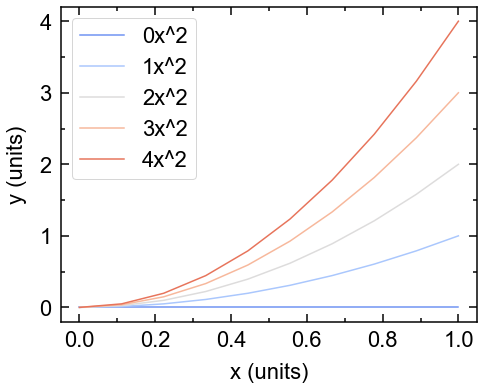

In [10]:
# Diverging colour palette

# 1. Define global plot parameters
plt.close("all")
DPI=150
figure_options={'figsize':(8.27,5.83)} #figure size in inches. A4=11.7x8.3. A5=8.27,5.83
font_options={'size':'22','family':'sans-serif','sans-serif':'Arial'}
plt.rc('figure', **figure_options)
plt.rc('font', **font_options)
LINEWIDTH = 1.5
MARKERSIZE = 5

# 2. Set colour palette
current_palette=sns.color_palette("coolwarm", NUMBEROFCURVES)
plt.rc('axes',prop_cycle=(cycler.cycler('color',current_palette)))

# 3. Call plots
f, ax=plt.subplots()
plt.subplots_adjust(left=0.25,bottom=0.2,right=0.95,top=0.95) # Set size of plot precisely

for j in range(NUMBEROFCURVES):
    ax.plot(x,y[:,j],'-',lw=LINEWIDTH,label=str(j)+'x^2')
    
formatplot(ax,'x (units)', 'y (units)',lw=LINEWIDTH)

ax.legend(loc='best');

# 4. Output and save
# f.tight_layout() # Arrange plot so fits in frame; overrides size setting in #2
# plt.savefig('./plot.pdf',dpi=DPI,transparent=True)

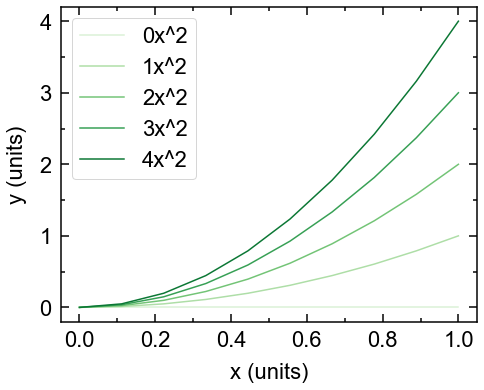

In [11]:
# Sequential colour palette

# 1. Define global plot parameters
plt.close("all")
DPI=150
figure_options={'figsize':(8.27,5.83)} #figure size in inches. A4=11.7x8.3. A5=8.27,5.83
font_options={'size':'22','family':'sans-serif','sans-serif':'Arial'}
plt.rc('figure', **figure_options)
plt.rc('font', **font_options)
LINEWIDTH = 1.5
MARKERSIZE = 5

# 2. Set colour palette
current_palette=sns.color_palette("Greens", NUMBEROFCURVES)
plt.rc('axes',prop_cycle=(cycler.cycler('color',current_palette)))

# 3. Call plots
f, ax=plt.subplots()
plt.subplots_adjust(left=0.25,bottom=0.2,right=0.95,top=0.95) # Set size of plot precisely

for j in range(NUMBEROFCURVES):
    ax.plot(x,y[:,j],'-',lw=LINEWIDTH,label=str(j)+'x^2')
    
formatplot(ax,'x (units)', 'y (units)',lw=LINEWIDTH)

ax.legend(loc='best');

# 4. Output and save
# f.tight_layout() # Arrange plot so fits in frame; overrides size setting in #2
# plt.savefig('./plot.pdf',dpi=DPI,transparent=True)

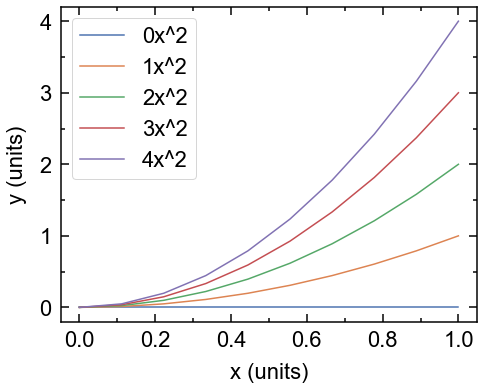

In [12]:
# Categorical colour palette

# 1. Define global plot parameters
plt.close("all")
DPI=150
figure_options={'figsize':(8.27,5.83)} #figure size in inches. A4=11.7x8.3. A5=8.27,5.83
font_options={'size':'22','family':'sans-serif','sans-serif':'Arial'}
plt.rc('figure', **figure_options)
plt.rc('font', **font_options)
LINEWIDTH = 1.5
MARKERSIZE = 5

# 2. Set colour palette
current_palette=sns.color_palette("deep", NUMBEROFCURVES)
plt.rc('axes',prop_cycle=(cycler.cycler('color',current_palette)))

# 3. Call plots
f, ax=plt.subplots()
plt.subplots_adjust(left=0.25,bottom=0.2,right=0.95,top=0.95) # Set size of plot precisely

for j in range(NUMBEROFCURVES):
    ax.plot(x,y[:,j],'-',lw=LINEWIDTH,label=str(j)+'x^2')
    
formatplot(ax,'x (units)', 'y (units)',lw=LINEWIDTH)

ax.legend(loc='best');

# 4. Output and save
# f.tight_layout() # Arrange plot so fits in frame; overrides size setting in #2
# plt.savefig('./plot.pdf',dpi=DPI,transparent=True)